In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('bank-full.csv')

In [3]:

# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Split the data into features (X) and target variable (y)
X = data.drop('y', axis=1)  # Assuming 'y' is the column representing whether the customer subscribed or not
y = data['y']

In [5]:
# Convert categorical variables to dummy/indicator variables (if needed)
X = pd.get_dummies(X)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Logistic Regression with feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [8]:
# Predictions
y_pred_scaled = logreg_scaled.predict(X_test_scaled)

In [9]:

# Confusion Matrix and Classification Report for Logistic Regression with feature scaling
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
class_report_scaled = classification_report(y_test, y_pred_scaled)

print("Confusion Matrix with Feature Scaling:\n", conf_matrix_scaled)
print("\nClassification Report with Feature Scaling:\n", class_report_scaled)

Confusion Matrix with Feature Scaling:
 [[7755  197]
 [ 719  372]]

Classification Report with Feature Scaling:
               precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



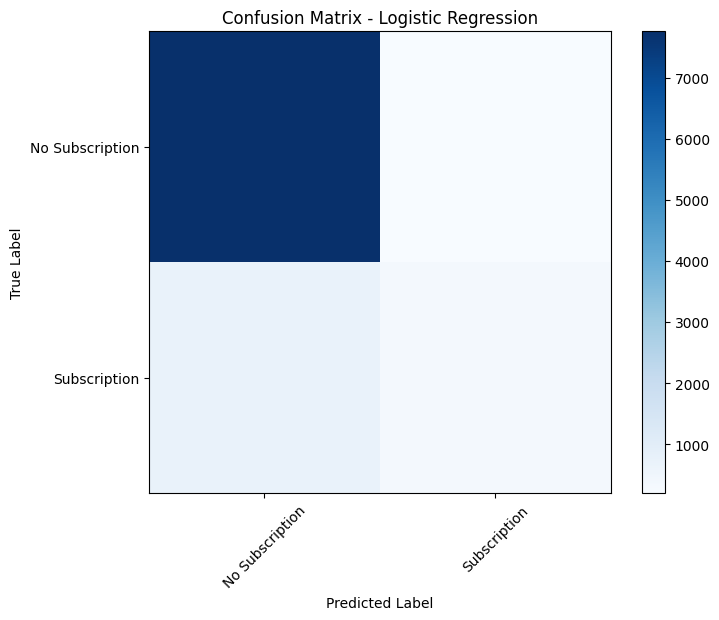

In [13]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_scaled, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()

classes = ['No Subscription', 'Subscription']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [14]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predictions
dt_y_pred = dt_classifier.predict(X_test)


In [16]:
# Confusion Matrix and Classification Report for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)
print("\nDecision Tree Classification Report:\n", dt_class_report)

Decision Tree Confusion Matrix:
 [[7372  580]
 [ 552  539]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.48      0.49      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.87      0.88      9043



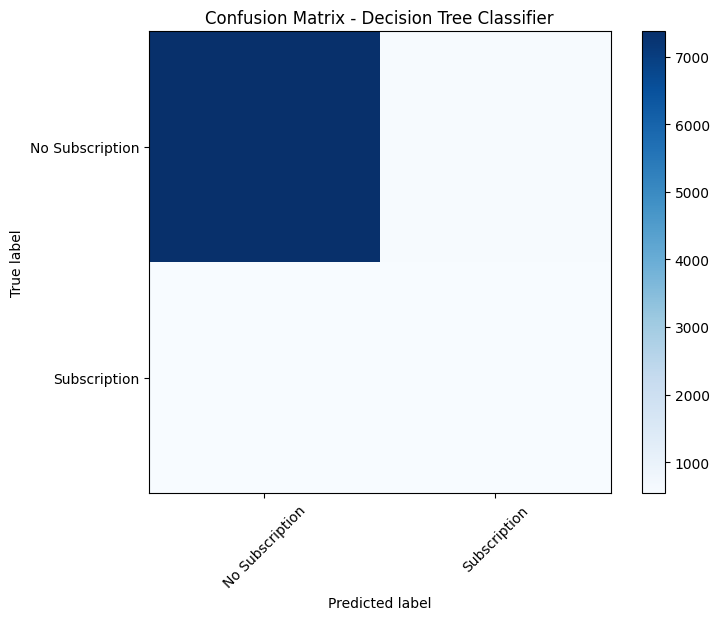

In [17]:
# Confusion Matrix Plot for Decision Tree Classifier
plt.figure(figsize=(8, 6))
plt.imshow(dt_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.colorbar()

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [18]:

# Convert 'yes' and 'no' to 1 and 0 in y_test
y_test_binary = y_test.map({'no': 0, 'yes': 1})

In [19]:
# ROC Curve for Logistic Regression with feature scaling
y_prob_scaled = logreg_scaled.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_scaled)
roc_auc = auc(fpr, tpr)

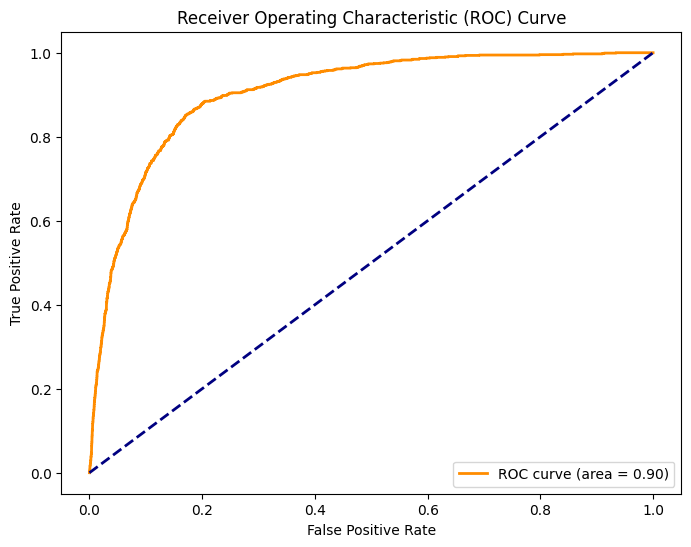

In [20]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import accuracy_score


In [23]:
# Logistic Regression without feature scaling
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions without feature scaling
y_pred = logreg.predict(X_test)

# Accuracy for Logistic Regression without feature scaling
accuracy_logreg = accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression (without feature scaling): {:.2%}".format(accuracy_logreg))



Accuracy for Logistic Regression (without feature scaling): 88.96%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Accuracy for Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, dt_y_pred)
print("Accuracy for Decision Tree Classifier: {:.2%}".format(accuracy_dt))



Accuracy for Decision Tree Classifier: 87.48%


In [25]:

# Accuracy for Logistic Regression with feature scaling
accuracy_logreg_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy for Logistic Regression (with feature scaling): {:.2%}".format(accuracy_logreg_scaled))


Accuracy for Logistic Regression (with feature scaling): 89.87%
